<link rel="stylesheet" href="../custom.css"/>   

# More Gravity Methods
--------------

Today's Goals:
* Recap
* Gravity Gradient
* Time-Lapse Gravity
* Borehole Gravity

# Gravity Gradient

## The oldest method of measuring gravity
<div class="row">
<div class="column">

* Torsion balance (circa Cavendish 1798)
    * Hang two masses on a balanced beam, measure the rotation of beam.
* Modern:
    * Spinning accelerometers
    * Measured from a moving platform!
![cubs](resources/11-gg_accel.png)
</div>
<div class="column">


![cubs](resources/11-gg-torsion.png)
</div>
</div>

## A small bit of theory
* Often in gravity we measure a single component (the vertical component)
* There are other components too!
* Gravity gradient is the spatial rate of change of each component of the gravity vector -> Tensor
$$ \vec{g}(\vec{r}_{obs}) = - \gamma m \frac{\vec{\Delta r}}{|\vec{\Delta r}|^3} \text{,}\hspace{20pt} \vec{\Delta r} = \vec{r}_{obs} - \vec{r}_{mass} $$
$$ GG(\vec{r}_{obs}) = \nabla \vec{g}^T(\vec{r}_{obs})$$
$$ GG(\vec{r}_{obs}) = -\gamma m \left( \frac{I_{3 \times 3}}{|\vec{\Delta r}|^3}  - 3 \frac{ \vec{\Delta r} \vec{\Delta r}^T}{|\vec{\Delta r}^5}\right)$$


## What does it look like?

In [3]:
import matplotlib.pyplot as plt
import geoana.gravity as grav
import numpy as np

In [7]:
x,y,z = np.mgrid[-100:100:256j,-100:100:256j, 0:1:1j].squeeze()
xyz = np.stack([x, y, z], axis=-1)

In [64]:
def make_grav_plot():
    source = grav.PointMass(mass=1E5, location=[0, 0, -25])
    gv = source.gravitational_field(xyz) * 1E8

    vabs = np.abs(gv).max()
    cmap = 'seismic'
    pcolor_kwargs = dict(cmap='seismic', vmin=-vabs, vmax=vabs)

    fig, axes = plt.subplots(1, 3, figsize=(10,4))
    ax = axes[0]
    ax.pcolormesh(x, y, gv[...,1].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_ylabel('Northing (m)')
    ax.set_xlabel('Easting (m)')
    ax.set_title(r'$G_N$')

    
    ax = axes[1]
    ax.pcolormesh(x, y, gv[...,0].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_yticklabels([])
    ax.set_xlabel('Easting (m)')
    ax.set_title(r'$G_E$')

    ax = axes[2]
    im = ax.pcolormesh(x, y, gv[...,2].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_yticklabels([])
    ax.set_xlabel('Easting (m)')
    ax.set_title(r'$G_D$')
    
    cb = plt.colorbar(im, ax=axes, shrink=0.7)
    cb.set_label(r'$\mu$Gal')

### Consider gravity from a point:

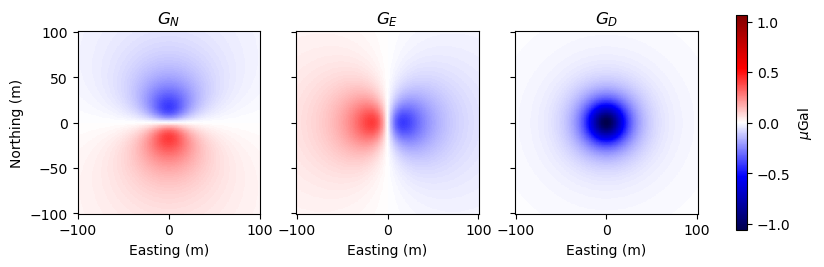

In [97]:
make_grav_plot()

In [95]:
def make_gg_plot():
    source = grav.PointMass(mass=1E5, location=[0, 0, -25])
    gg = source.gravitational_gradient(xyz) * 1E8

    vabs = np.abs(gg).max()
    cmap = 'seismic'
    pcolor_kwargs = dict(cmap='seismic', levels=np.linspace(-vabs,vabs,51))

    fig, axes = plt.subplots(3, 3, figsize=(10,10))
    ax = axes[0, 0]
    ax.contourf(x, y, gg[..., 1, 1].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_ylabel('Northing (m)')
    ax.set_title(r'$G_{NN}$')
    
    ax = axes[0, 1]
    ax.contourf(x, y, gg[..., 1, 0].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_title(r'$G_{NE}$')
    
    ax = axes[1, 0]
    ax.contourf(x, y, gg[..., 0, 1].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_ylabel('Northing (m)')
    ax.set_title(r'$G_{EN}$')
    
    ax = axes[0, 2]
    ax.contourf(x, y, gg[..., 1, 2].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_title(r'$G_{NZ}$')
    
    ax = axes[2, 0]
    ax.contourf(x, y, gg[..., 2, 1].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_ylabel('Northing (m)')
    ax.set_xlabel('Easting (m)')
    ax.set_title(r'$G_{ZN}$')
    
    ax = axes[1, 1]
    ax.contourf(x, y, gg[...,0, 0].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_yticklabels([])
    ax.set_title(r'$G_{EE}$')
    
    ax = axes[1, 2]
    ax.contourf(x, y, gg[..., 0, 2].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_title(r'$G_{EZ}$')
    
    ax = axes[2, 1]
    ax.contourf(x, y, gg[..., 2, 0].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_ylabel('Northing (m)')
    ax.set_xlabel('Easting (m)')
    ax.set_title(r'$G_{EN}$')

    ax = axes[2, 2]
    im = ax.contourf(x, y, gg[...,2, 2].reshape(x.shape), **pcolor_kwargs)
    ax.set_aspect(1)
    ax.set_yticklabels([])

    ax.set_xlabel('Easting (m)')
    ax.set_title(r'$G_{DD}$')
    
    cb = plt.colorbar(im, ax=axes, shrink=0.7)
    cb.set_label(r'$\mu$Gal')

### Gravity gradient looks like:

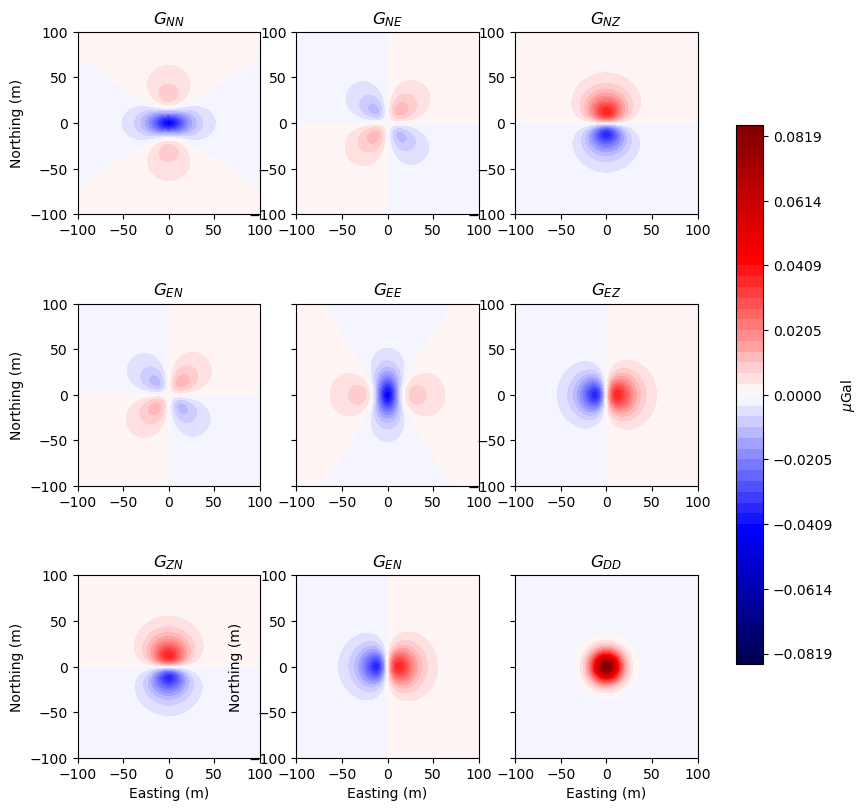

In [98]:
make_gg_plot()

### Gravity Gradient
* Each observation is a component of a tensor!
$$
\begin{pmatrix}
G_{xx} & G_{xy} & G_{xz}\\
G_{yx} & G_{yy} & G_{yz}\\
G_{zx} & G_{zy} & G_{zz}
\end{pmatrix}
$$

* That tensor is symmetric:
$$ G_{ij} = G_{ji}$$
* Also has zero-trace.... why?
$$ G_{xx} + G_{yy} + G_{zz} = 0 $$

## Units?
* Gravity (an acceleration) (m/s^2) -> 10E5 mGal
* GG, rate of spatial change of gravity
    * 1 Eotvos = 10E-9 (1/s^2)
    * 1Eo = 1E-4 (mGal/m)
    * 1Eo = 0.1 (mGal/km) = (0.1 µGal/m)
    * 1Eo = (1E-3 µGal/cm)
* Current instrument sensitivity ~ 1-2 Eotvos

### Interpreting GG data:
Usually through inversion.
<div class="row">
<div class="column">

GG Data
![gg-data](resources/11-gg-dat.png)
Can you see any features that look like point anomalies?
</div>
<div class="column">

GG Inversion
![inversion](resources/11-gg-interp.png)
</div>
</div>
(Martinez et. al. 2012)

# Time-lapse Gravity

### Consider
Which gravity corrections are (relatively) not time dependent?

* Latitude
* Terrain
* Free-air
* Isostatic

What happens if we take a gravity measurement at the same location two times over a long time period (tears apart)?

## Time-lapse gravity
$$ \Delta g = g_{obs, 2} - g_{obs, 1}$$
$$\Delta g = g_{anomaly, 2} + g_{drift, 2} + g_{lat} + g_{free_air} + g_{terrain}... - (g_{obs, 1} + g_{drift, 1} + g_{lat} + g_{free_air} + ...) $$
$$\Delta g  = g_{anomaly, 2} - g_{anomaly, 1} + (drift)$$


## But what is the change in gravity related to?
What can change in this equation in time?
$$ \vec{g}(\vec{r}_{obs}) = - \gamma \int_{V} \rho(\vec{r'}) \frac{\vec{\Delta r}}{|\vec{\Delta r}|^3} dV' $$

* Sensitive to changes in mass distribution over time!

### Leyden Mine:
<div class="row">
<div class="column">


![LeydenCross](resources/10-Leyden-Cross.png)

</div>
<div class="column">
    
![LeydenExtent](resources/10-Leyden-extent.png)
</div>
</div>

# Density Determination


# A quick note on density logging
Density information is used in:
* Reducing observed data (Terrain correction)
* Forward modeling (As a necessity)
* Inversion (prior information)
* Interpretation (to correlate with geology)

How can we determine absolute density?
* Direct sampling (surface and drill cores)
* Gamma ray logging
* Borehole gravity
* etc.


# Density Logs:
From a borehole gravimeter:

![density log](resources/11-density-log.png)

## Gamma-ray Logging
![gamma log](resources/11-gamma-log.png)